## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
import requests
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [2]:
# 我們自己斷行
data = data.split("\n")
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe
#### 如果pd.DataFrame 餵入的值為2維list，未如字典指定columnName ，系統內定0123....

In [3]:
import pandas as pd

arrange_data = []
for d in data:
    line = d.split("\t")
    arrange_data.append(line)
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 懶人解法：直接用 pandas 讀取網路連結

In [4]:
## 注意：一行中的分隔符號有時候為 "," (預設), 但也常常是 tab (\t)
## 如果非 "," 的話，記得要加上參數告訴 pd.read_csv
## 建議你/妳可以把 sep 的參數抽掉試看看

df_lazy = pd.read_csv(target_url, sep="\t", header=None)

In [5]:
df_lazy.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

(435, 499, 3)


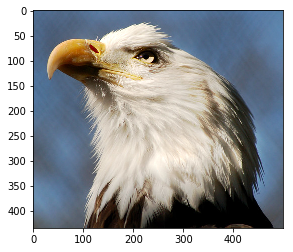

In [6]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

response = requests.get(df.loc[0, 1]) # 先讀取第一筆資料的圖片
img = Image.open(BytesIO(response.content))
img = np.array(img)
print(img.shape)
plt.imshow(img)
plt.show()

In [6]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256)) # 假如 resize, 就先統一到 256 x 256
            img = np.array(img)
            img_list.append(img)
        except:
            # 只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以我們用 Try 語法避開取不到的狀況
            pass
    
    return img_list

In [12]:
result = img2arr_fromURLs(df[5:15][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

Total images that we got: 0 


In [13]:
result = img2arr_fromURLs(df[0:15][1].values, resize=True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

Total images that we got: 0 
